#                              **Práctica 1**

## **Ecosistema de un Administrador de Bases de datos y creación de una API**


 **Material Utilizado:**

**Una máquina virtual de AWS con una IP publica, sistema operativo Linux (ubuntu 18.04), memoria 8 GiB memory.**


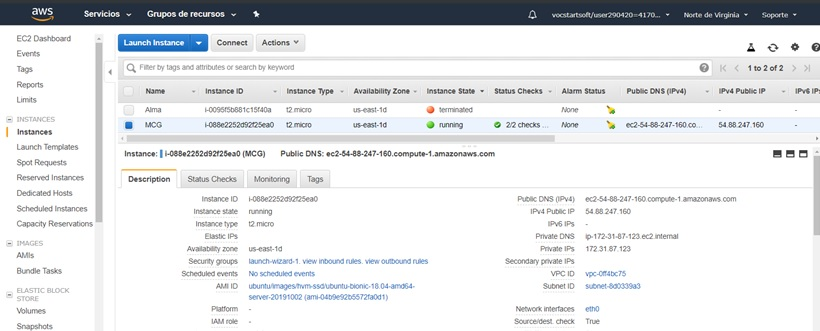

In [12]:
from IPython.display import Image
Image('/content/i.jpg')
      

**La maquina debe tener habilitado el puerto 3000**

**Desde simbolo de sistema se accedio a la maquina virtual.**

### Ya en la maquina virtual desde consola actualizamos los paquetes:

In [0]:
sudo apt-get update

**Instalamos NodeJs**

In [0]:
sudo apt-get install nodejs

**Instalamos el gestor de paquetes de NodeJs**

In [0]:
sudo apt-get install npm

**Instalamos el generador de aplicaciones Express**

In [0]:
sudo npm install express-generator@4 -g

**Desde cosnola instalamos PostgreSQL**

In [0]:
sudo apt install postgresql postgresql-contrib

**Ingresamos al súperusuario postgres**

In [0]:
sudo -i -u postgres

**Abrimos PostgreSQL**

In [0]:
psql

**Salir de PostgreSQL**

In [0]:
\q

### Creamos un rol para PostgreSQL:

**Seguimos en el súperusuario**

In [0]:
sudo -u postgres createuser --interactive

### Creamos una base de datos (user)

**Seguimos en el súperusuario**

In [0]:
sudo -u postgres createdb test

### Creamos un nuevo proyecto

In [0]:
cd /home


In [0]:
sudo mkdir practicas

In [0]:
cd practicas

In [0]:
sudo express practica_01

In [0]:
cd practica_01

Contedido: ls -la



In [0]:
sudo npm install

**Iniciamos el servidor **

In [0]:
sudo npm start

localhost:3000/



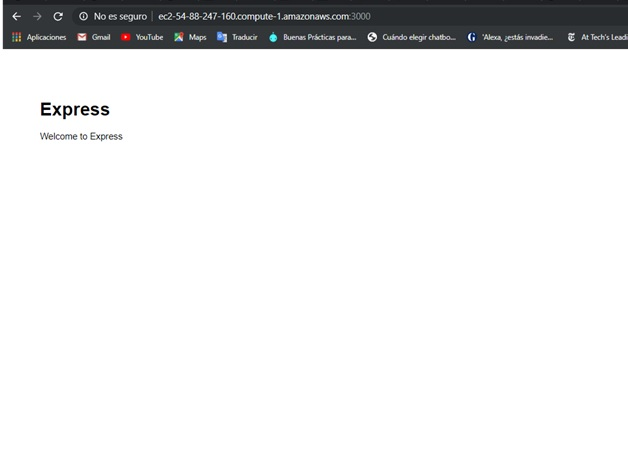

In [14]:
from IPython.display import Image
Image('/content/I1.jpg')
      

**Desde consola nos muestra los accesos al servido:**


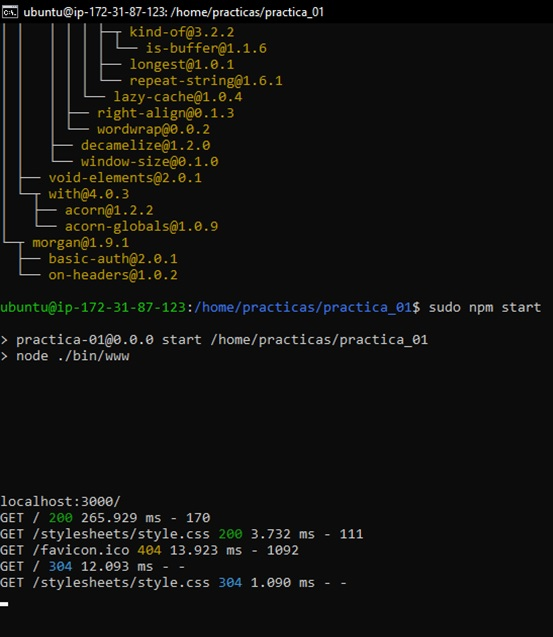

In [15]:
from IPython.display import Image
Image('/content/I2.jpg')
      

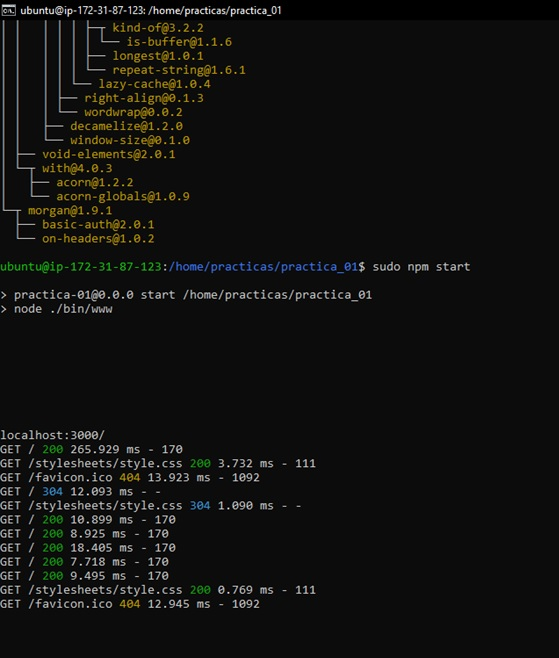

In [16]:
from IPython.display import Image
Image('/content/I3.jpg')

### Regresando a el súperusuario

**Instalamos pg-promise**

In [0]:
sudo npm install pg-promise@5 --save

**Instalamos bluebird**

In [0]:
sudo npm install bluebird@3 --save

### Nos posicionamos en en proyecto

In [0]:
cd /home


In [0]:
cd practicas

In [0]:
cd practica_01

**Creamos un archivo llamado queries.js**

In [0]:
sudo nano queries.js

In [0]:
var promise = require('bluebird');

var options = {
// Initialization Options
promiseLib: promise
};

var pgp = require('pg-promise')(options); //Instancia de pg-promise
var connectionString = 'postgres://localhost:5432/puppies';
var db = pgp({
        host: 'localhost',
        port: 5432,
        database: 'puppies',
        user: 'postgres',
        password: 'postgres'
});


// add query functions

module.exports = {
  getAllPuppies: getAllPuppies,
  getSinglePuppy: getSinglePuppy,
  createPuppy: createPuppy,
  updatePuppy: updatePuppy,
  removePuppy: removePuppy
};

ctrl + x

Guardar

### Creamos la base de datos

**Creamos un archivo llamado puppies.sql**

In [0]:
sudo nano puppies.sql

In [0]:
DROP DATABASE IF EXISTS puppies;
CREATE DATABASE puppies;

\c puppies;

CREATE TABLE pups (
  ID SERIAL PRIMARY KEY,
  name VARCHAR,
  breed VARCHAR,
  age INTEGER,
  sex VARCHAR
);

INSERT INTO pups (name, breed, age, sex)
  VALUES ('Tyler', 'Retrieved', 3, 'M');

ctrl + x

Guardar

**Corremos el sql**

In [0]:
sudo -u postgres psql -f puppies.sql

**Revisamos que tenga datos la base de datos**

In [0]:
sudo -u postgres psql

In [0]:
\l

In [0]:
\c puppies

In [0]:
\dt

In [0]:
select * from pups;

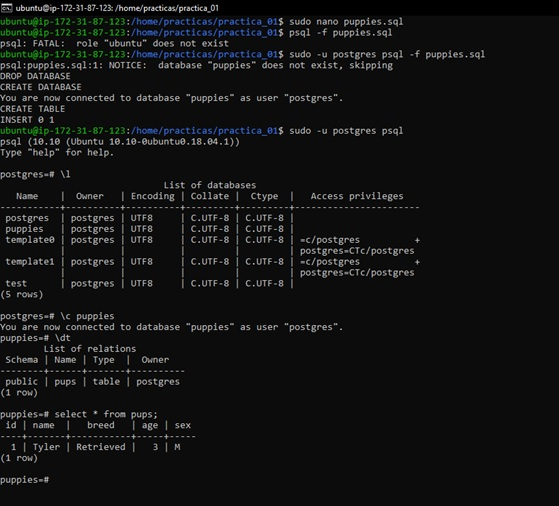

In [17]:
from IPython.display import Image
Image('/content/I4.jpg')

### Configuramos rutas

**Ir a routes**

In [0]:
cd routes/

**Editamos el archivo /routes/index.js**

In [0]:
sudo nano index.js

In [0]:
Añadir funciones/queries al archivo /queries.js

var express = require('express');
var router = express.Router();

var db = require('../queries');


router.get('/api/puppies', db.getAllPuppies);
router.get('/api/puppies/:id', db.getSinglePuppy);
router.post('/api/puppies', db.createPuppy);
router.put('/api/puppies/:id', db.updatePuppy);
router.delete('/api/puppies/:id', db.removePuppy);


module.exports = router;

ctrl + x

Guardar

**Instalamos Forever**

In [0]:
sudo npm install -g forever

**Usar Forever en el proyecto**

In [0]:
sudo forever start bin/www

### POSTMAN

**Método POST**

In [0]:
function createPuppy(req, res, next) {
  req.body.age = parseInt(req.body.age);
  db.none('insert into pups(name, breed, age, sex)' +
      'values(${name}, ${breed}, ${age}, ${sex})',
    req.body)
    .then(function () {
      res.status(200)
        .json({
          status: 'success',
          message: 'Inserted one puppy'
        });
    })
    .catch(function (err) {
      return next(err);
    });
}

In [0]:
curl --data "name=Whisky&breed=annoying&age=3&sex=f" \
http:// ec2-54-88-247-160.compute-1.amazonaws.com:3000/api/puppies
